In [1]:
import Agent_Library
from Agent_Library import np, plt, tf, Camera, nx

import pandas as pd

In [3]:
def Initializer(N, L):
    # -----------------------------------------------------------------------------------
    camera = Camera(plt.figure(figsize=(15,15)))

    # Build the environment and the agents ----------------------------------------------
    Agents, states = [], []
    for _ in range(N): 
        Agents.append(Agent_Library.Distributed_Agent(L, flipping=True, moving=False, training=False))
        states.append([ 1, 1, 1 ])
    
    environment = Agent_Library.Plot_Environment(L, Agents)
    
    # Parameters displayed in plots -----------------------------------------------------
    Hamilton = []               # To display the Hamiltonian value per episede
    Giant  = []                 # To display the percentage of members of the giant component 
    Edges  = []                 # To display the number of links in the network
    Energy = []                 # To display the amount of energy consumed by all agents
    Tau    = []                 # To show the stability of links
    
    return camera, environment, Agents, states,  Hamilton, Giant, Edges, Energy, Tau


Episode: 999, H: -160.634, N: 50.0

 -152.9110206122835


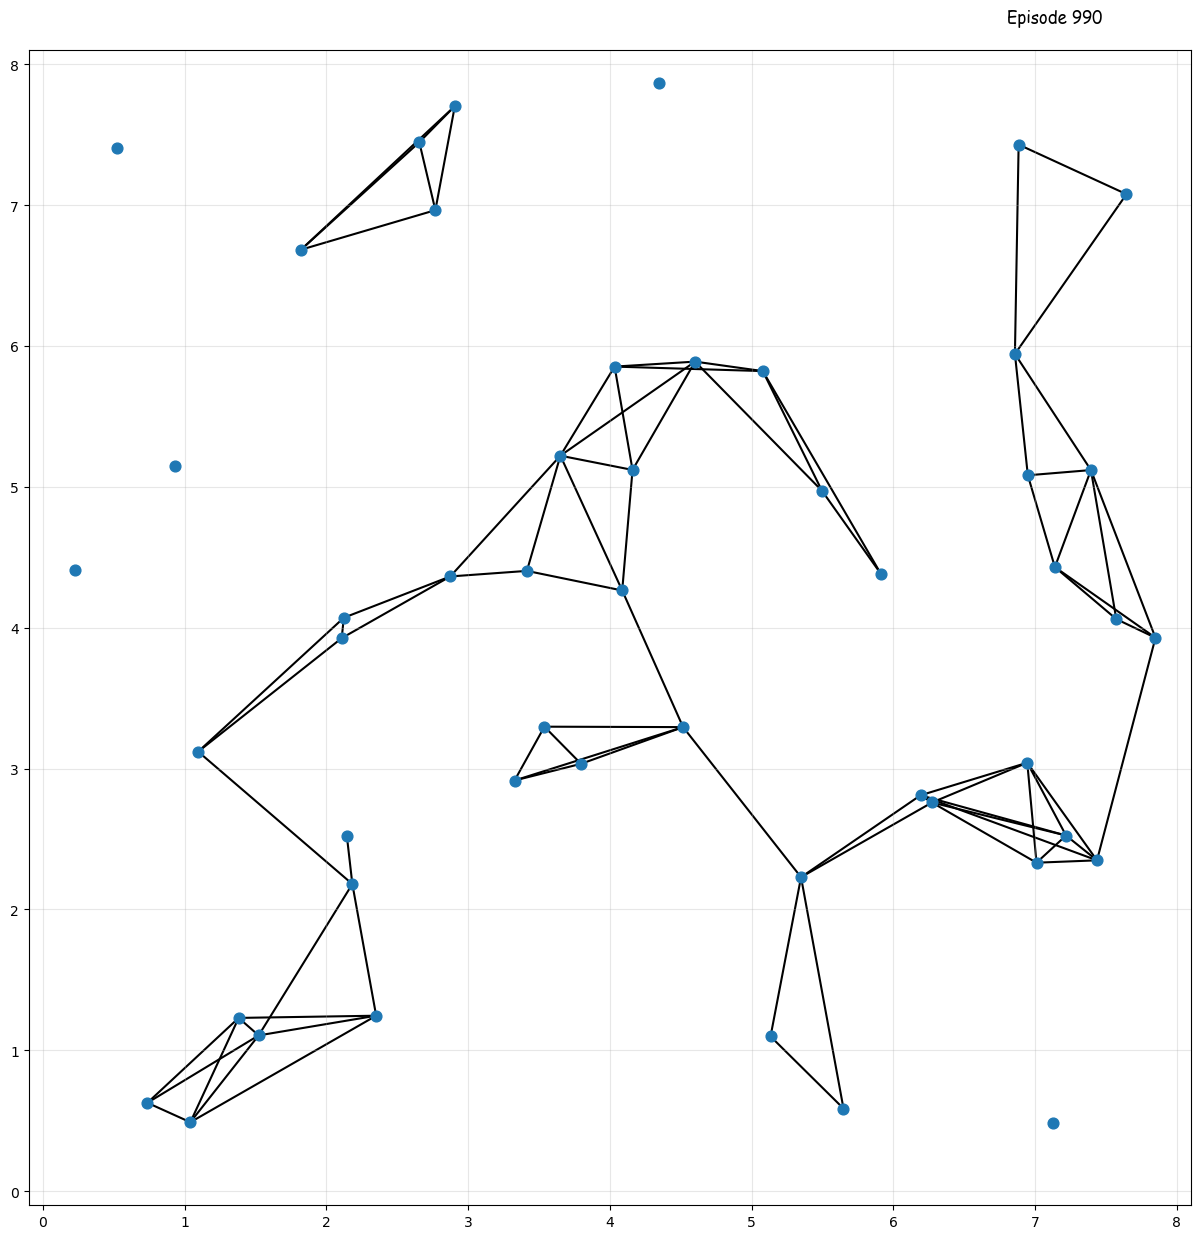

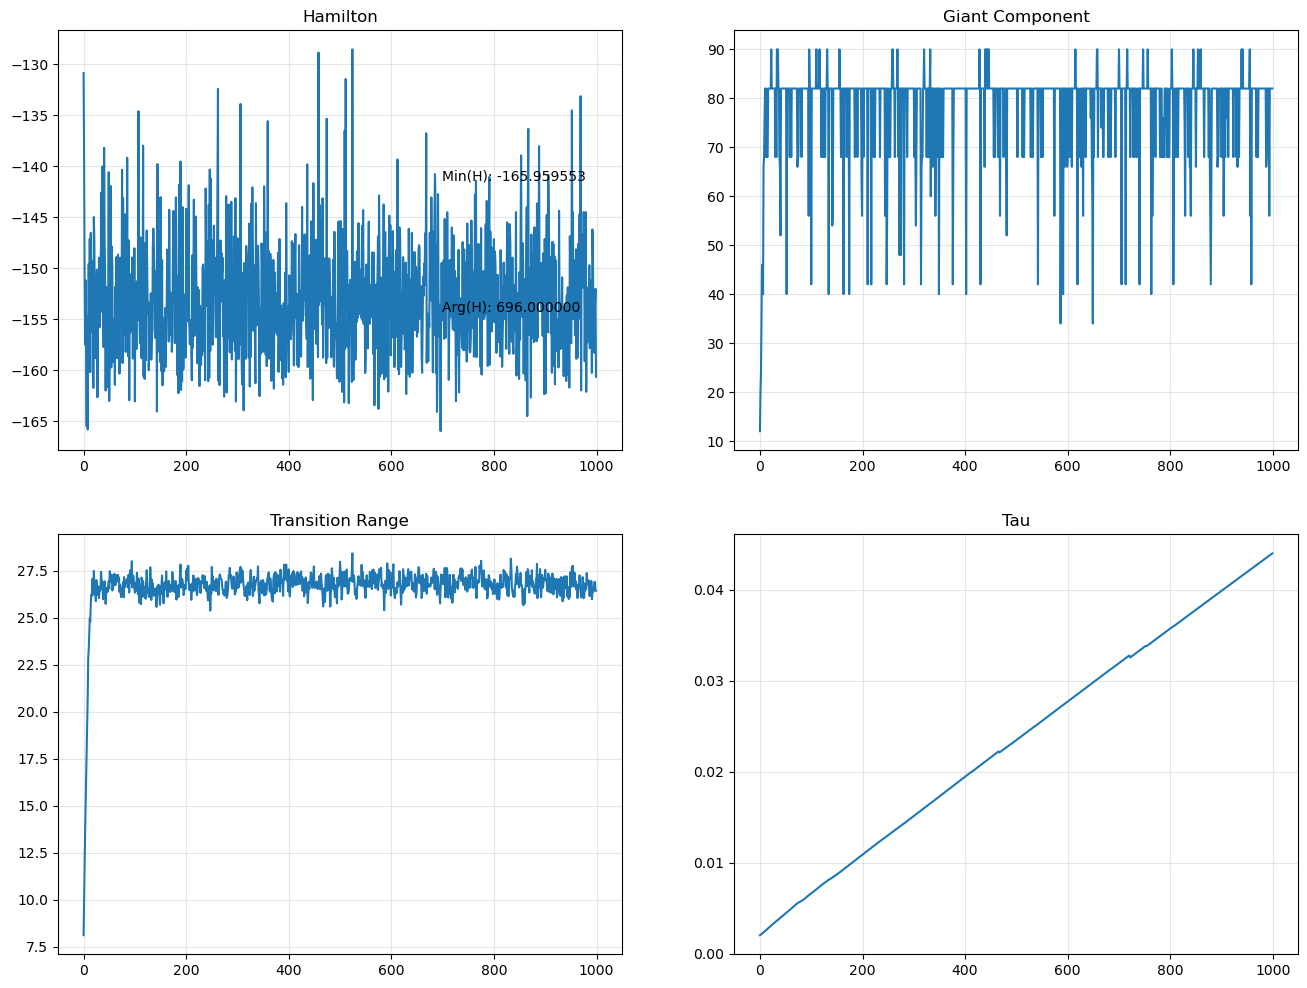

In [4]:
N = 50                      # Number of agents
L = 8                       # The length of the simulation box
camera, environment, Agents, states, Hamilton, Giant, Edges, Energy, Tau = Initializer(N, L)


for episode in range(1000):
    for i in range(len(Agents)):
        states[i] = Agents[i].Prediction(states[i], (Agents[:i] + Agents[i+1:]))

    # Show Results --------------------------------------------------------------------------
    hamilton, edge, energy, giant, tau = environment.Calculate_Result(Agents)
    Hamilton.append(hamilton)
    Edges.append(edge)
    Energy.append(energy)
    Giant.append(giant)
    Tau.append(tau)

    if episode%10 == 0: environment.Animation(camera, episode)

    print("\rEpisode: {}, H: {:.3f}, N: {:.1f}".format(episode, hamilton, environment.N), end="")

anim = camera.animate(interval= 120, repeat=True, repeat_delay= 500, blit=True)
anim.save('./All result/animation.gif')

#-------------------------------------------------------------------------------
print("\n\n", np.average(Hamilton))
environment.Static_Plot(episode, Hamilton, Edges, Energy, Giant, Tau)

#-------------------------------------------------------------------------------
df = pd.DataFrame({'Hamilton': Hamilton, 'Giant': Giant, 'Edges': Edges, 'Energy': Energy, 'Tau': Tau})
df.to_csv('./All result/csv/Results.csv')

